# Math

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 专题
### 1.1 非正态分布数据转换成正态分布
**e.g.** 从均匀分布采样$x$，得到$y=x^2$，将非正态分布$y$转化为正太分布

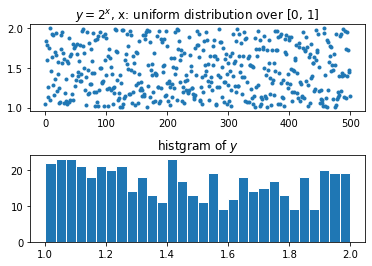

In [2]:
# transform any distribution into Gaussian
n = 500

orig_data = 2**np.random.rand(n)

ax1 = plt.subplot(211)
ax1.plot(orig_data, '.')
ax1.set_title('$y=2^x$, x: uniform distribution over [0, 1]')

ax2 = plt.subplot(212)
ax2.set_title('histgram of $y$')
ax2.hist(orig_data, bins=30, edgecolor='w')

plt.subplots_adjust(hspace=0.5)
plt.show()

上图说明$y$不是正态分布，通过`rankdata`得到$y$中每个值的顺序号，并且计算这些序号的histgram。

```python
>>> rankdata([0, 2, 3, 2])
array([1., 2.5, 4., 2.5])
# 因为有两个2，所以并列第二，2.5=(2+3)/2
```

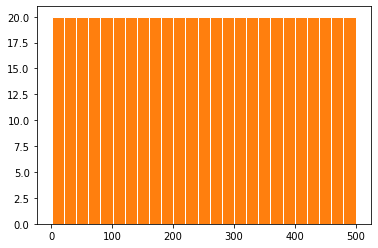

In [3]:
# rank transform
from scipy.stats import rankdata
trans_data = rankdata(orig_data)

# the result of rankdata start from 1
bins_boundary = np.arange(np.min(trans_data), np.max(trans_data)+9, 10)
plt.hist(trans_data, bins=bins_boundary, edgecolor='w')
plt.hist(trans_data, bins=25, edgecolor='w')
plt.show()

上图25个bin的值相同（都是20个，500可以被25整除）,可以分别打印出排序后的前十个和后十个数据。

In [4]:
sorted_data = np.sort(trans_data)
print('top 10:', sorted_data[:10], '\nbtm 10:', sorted_data[-10:])

del sorted_data

top 10: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
btm 10: [491. 492. 493. 494. 495. 496. 497. 498. 499. 500.]


这也说明了，任一组大小为500的数据，只要包含相同值的个数和位置一样，通过此方法转化的正态分布是一样的。

例如`A=[0, 0, 1, 2, 3]`，`B=[200, 100, 100, 300, 400]`由于相同值的个数（分别为两个0和两个100）和位置（都是最小的）都一样，这两组数据转换完的分布是一样的。

下面将序号归一化到(-1, 1)之间，注意后面的`arctanh`输入范围为(-1, 1)，所以使用了一个小技巧，先加上一个比当前最大值大一（max+1）的数，再让所有的数除以这个数（归一化到(0-1)），最后再删除多出的的1。

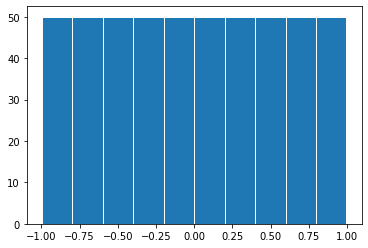

In [5]:
# add a data point to the top
norm_data = np.append(trans_data, np.max(trans_data)+1)

norm_data = 2*(norm_data/np.max(norm_data))-1
norm_data = np.delete(norm_data, n)

plt.hist(norm_data, bins=10, edgecolor='w')

plt.show()

最后利用`arctan`函数的性质：“从0向周围发散（横坐标分辨率固定）”，将归一化的数据转成了正态分布的形式。

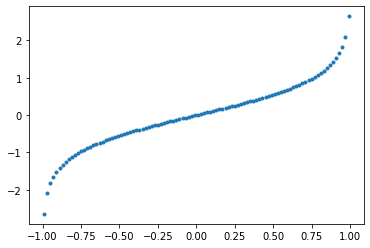

In [6]:
x = np.linspace(-0.99,0.99,100)

plt.plot(x, np.arctanh(x), '.')

del x

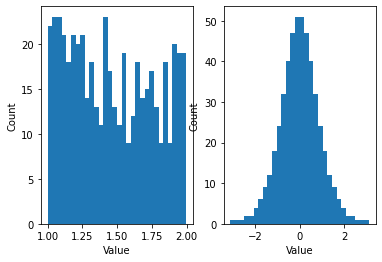

In [7]:
gaussian_data = np.arctanh(norm_data)

fig, ax = plt.subplots(1, 2)

ax[0].hist(orig_data, 30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

ax[1].hist(gaussian_data, 30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

plt.show()

## 2 函数

### 2.1 Exponential Function
$$f(x) = a^x$$

$$\text{exp}(x) = e^x$$

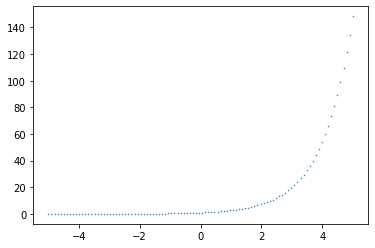

In [8]:
x = np.linspace(-5, 5, 100)
y = np.exp(x) # np.logspace

plt.plot(x, y, '.',  markersize=1)

### 2.2 Hyperbolic Functions
https://www.mathsisfun.com/sets/function-hyperbolic.html

$$\tanh (x)=\frac{\sinh (x)}{\cosh (x)}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

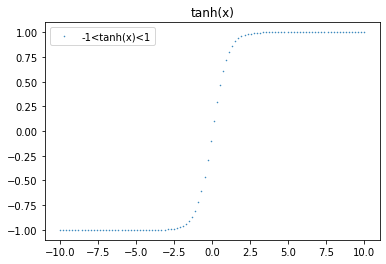

In [9]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

plt.plot(x, y, '.',  markersize=1)
plt.title('tanh(x)')
plt.legend(["-1<tanh(x)<1"])

因为`tanh`的值域为$(-1, 1)$，所以`arctanh`的定义域为$(-1, 1)$

Text(0.5, 1.0, 'arctanh(x)')

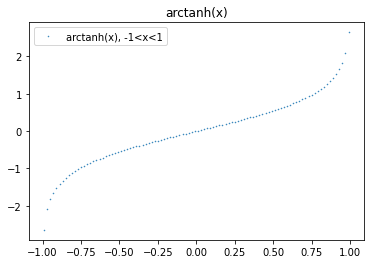

In [10]:
x = np.linspace(-0.99, 0.99, 100)

plt.plot(x, np.arctanh(x), '.',  markersize=1)

plt.legend(["arctanh(x), -1<x<1"])
plt.title('arctanh(x)')